In [1]:
include("../lna.jl")
include("../functions.jl")

log_likelihood_whole_cell (generic function with 2 methods)

## Comparing the canonical model to the model with bound ribosomes

## Increasing k3

In [93]:
k3s = 0.1:1.:200
ff_can = zeros(length(k3s))
ff_rib = zeros(length(ff_can))
ratios = zeros(length(ff_can))
for i in 1:length(k3s)
    ps_rib = [10.0, 0.1, 1.0, 0.2, k3s[i], 0.1, 1.0, 0.1, 0.1];
    prob = LNAProblem(rn_rib, zeros(length(species(rn_rib))), ps_rib)

    sol = solve(prob)

    lnameans_rib = mean(sol)
    lnacovs_rib = StatsBase.cov(sol)

    ps_can = ps_can_f(ps_rib, lnameans_rib)
    
    prob = LNAProblem(rn_can, zeros(length(species(rn_rib))), ps_can)
    sol = solve(prob)
    
    lnameans_can = mean(sol)
    lnacovs_can = StatsBase.cov(sol)
    
    ff_can[i] = lnacovs_can[2,2]/lnameans_can[2]
    ff_rib[i] = lnacovs_rib[3,3]/lnameans_rib[3]
    ratios[i] = lnameans_rib[3]/lnameans_rib[1]
end

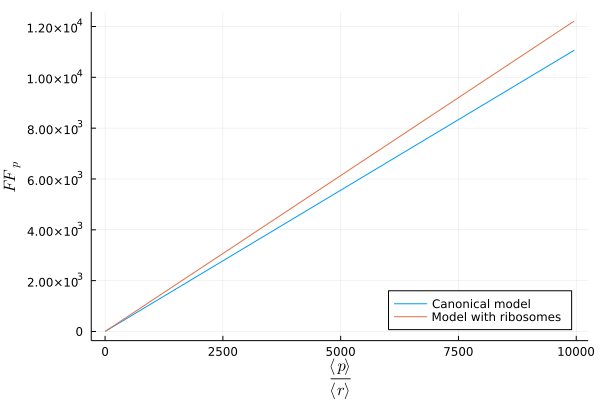

In [132]:
plot(ratios, ff_can, label="Canonical model")
plot!(ratios, ff_rib, label = "Model with ribosomes", legend=:bottomright, xlabel=L"\frac{\langle p \rangle}{\langle r \rangle}", ylabel=L"FF_p")

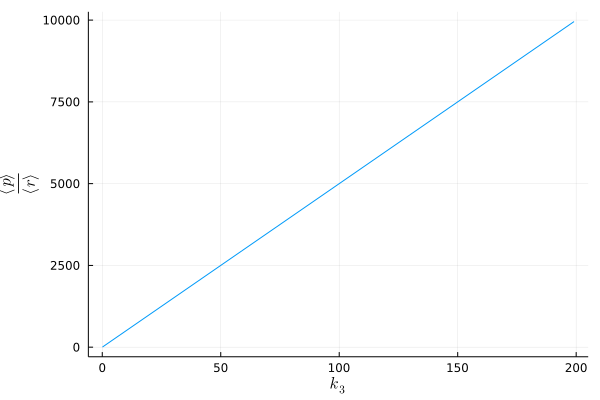

In [95]:
plot(k3s, ratios, legend=:false, ylabel = L"\frac{\langle p \rangle}{\langle r \rangle}", xlabel=L"k_3")

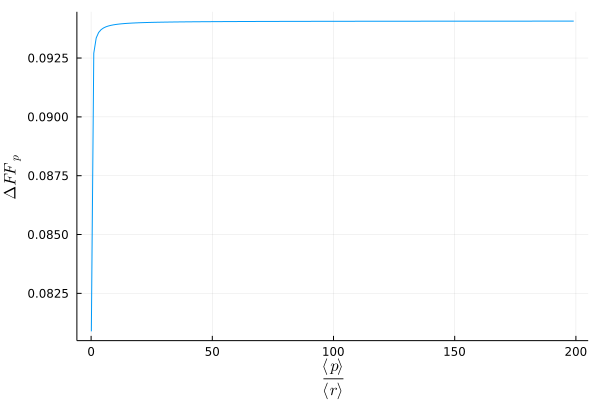

In [97]:
rel_error_FF = (ff_rib .- ff_can) ./ ff_rib

plot(k3s, rel_error_FF, legend=:false, xlabel = L"\frac{\langle p \rangle}{\langle r \rangle}", ylabel=L"\Delta FF_p")

## Confirming a case where the FF diverges.

In [125]:
ps_rib = [10.0, 0.1, 1.0, 0.2, 25, 0.1, 1.0, 0.1, 0.1]

prob = LNAProblem(rn_rib, zeros(length(species(rn_rib))), ps_rib)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn_rib, initial_values, (0, 500000.),  ps_rib)
jump_prob = JumpProblem(rn_rib, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=10.0)

protein_counts_rib = map(x -> x[3], sol.u);

In [126]:
ps_can = ps_can_f(ps_rib, lnameans)

prob = LNAProblem(rn_can, zeros(length(species(rn_can))), ps_can)

sol = solve(prob)

lnameans_can = mean(sol)
lnacovs_can = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans_can))

prob = DiscreteProblem(rn_can, initial_values, (0, 500000.),  ps_can)
jump_prob = JumpProblem(rn_can, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=10.0)

protein_counts_can = map(x -> x[2], sol.u);

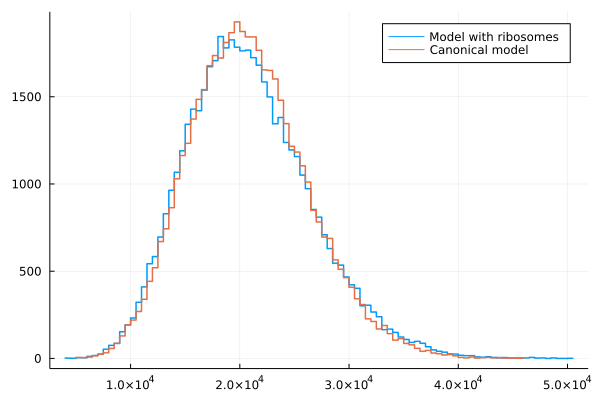

In [127]:
stephist(protein_counts_rib, linewidth=1.5, label="Model with ribosomes")
stephist!(protein_counts_can, linewidth=1.5, label="Canonical model")

In [118]:
using Serialization

f = serialize("fano_factor/protein_counts_rib.dat", protein_counts_rib)
f = serialize("fano_factor/protein_counts_can.dat", protein_counts_can)


400008

In [67]:
(var(protein_counts_can) - var(protein_counts_rib))/var(protein_counts_rib)

-0.09151850109482997